<div style="margin: 0 auto;
            max-width: 600px;">
    <div style="background-image: url('https://i.gifer.com/YcsK.gif');
                background-size: cover;
                padding: 50px;
                font-family: Verdana, sans-serif; /* Changed font family */
                border: 4px solid #fff;
                border-radius: 20px;
                color: #7469B6; /* Text color */
                text-align: center;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #fff;">Spaceship Titanic || Analyzing a Space Mystery🔍</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>

<div class="author-card" style="border-radius: 10px; overflow: hidden; box-shadow: 0px 0px 20px rgba(0, 0, 0, 0.2); transition: transform 0.3s ease; background-image: url(https://i.pinimg.com/originals/ea/1d/97/ea1d9797c9bf3dda7a23b238e5e4b364.jpg); background-size: cover;">
    <div style="padding: 20px; text-align: center;">
        <h3 style="color: white; font-weight: bold;">Introduction</h3>
    </div>
    <div style="padding: 20px;">
        <p style="text-align: justify; color: white;">
            In this notebook, we will analyze the mysterious transportation of Spaceship Titanic passengers to an alternate dimension. We will use Machine Learning and Plotly interactive charts to achieve it. We will also use the Missingno library to visualize the missing data. So, ready up the engines! <strong> 3, 2, 1 BLAST OFF! </strong>
        </p>
    </div>
</div>

<style>
    .author-card:hover {
        transform: translateY(-5px);
    }
</style>

<div class="author-card" style="border-radius: 10px; overflow: hidden; box-shadow: 0px 0px 20px rgba(0, 0, 0, 0.2); transition: transform 0.3s ease; background-image: url(https://i.pinimg.com/originals/ea/1d/97/ea1d9797c9bf3dda7a23b238e5e4b364.jpg); background-size: cover;">
    <div style="padding: 20px; text-align: center;">
        <h3 style="color: white; font-weight: bold;">Table of Contents</h3>
    </div>
    <div style="padding: 20px;">
        <p style="text-align: justify; color: white;">
        <ul style="color: white;"> <li>Introduction</li> <li>Setup</li> <li>Simple Analysis</li> <li>Missing Data Analysis</li> <li>Exploratory Data Analysis </li> <li>Predictions </li> </ul>
        </p>
    </div>
</div>

<style>
    .author-card:hover {
        transform: translateY(-5px);
    }
</style>

<hr>
<hr>

<p id="1" style="padding: 15px; background-image: url(https://img.freepik.com/free-photo/beautiful-constellations-sky-full-stars_23-2149988813.jpg); margin: 0; color: white; border: 3px solid white; font-family: 'Brush Script MT', cursive;font-weight: bold; font-size: 30px; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.7); letter-spacing: 1.5px;">1 |  Setup </p>

> ***Let's setup the notebook. For this project we will need RandomForestClassifier, XGBClassifier, VotingClassifier, Pipline, SimpleImputer, OneHotEncode, and other important tools. We will also use the [missingno](https://github.com/ResidentMario/missingno) library to visualize the missing data.***

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px 
import plotly.graph_objects as go 
import missingno as msno
print("Setup Complete")

Setup Complete


In [2]:
data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
print("Data loaded successfully")

Data loaded successfully


In [3]:
print("The first five rows of the training data:")
data.head(5)

The first five rows of the training data:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print("The first five rows of the test set:")
test.head(5)

The first five rows of the test set:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print("The first five rows of the sample submission dataset:")
sub.head(5)

The first five rows of the sample submission dataset:


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


<p id="1" style="padding: 15px; background-image: url(https://img.freepik.com/free-photo/beautiful-constellations-sky-full-stars_23-2149988813.jpg); margin: 0; color: white; border: 3px solid white; font-family: 'Brush Script MT', cursive;font-weight: bold; font-size: 30px; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.7); letter-spacing: 1.5px;">2 |  Simple Analysis </p>

> ***Now let's take a look at some of the properties of the data, like the shape and columns.***

In [6]:
print("Simple Analysis")
print("---------------")
print("Shape")
print('Training Set: ', data.shape)
print('Test Set: ', test.shape)
print('---------------')
print("Null Count")
print("Training Set: ", data.isnull().any().sum())
print("Test Set: ", test.isnull().any().sum())
print('----------------')
print('Columns')
print("Training set; Columns: ", data.columns)
print("Types:")
print(data.dtypes)
print("Test set; Columns: ", test.columns)
print("Types:")
print(test.dtypes)

Simple Analysis
---------------
Shape
Training Set:  (8693, 14)
Test Set:  (4277, 13)
---------------
Null Count
Training Set:  12
Test Set:  12
----------------
Columns
Training set; Columns:  Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Types:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
Test set; Columns:  Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
Types:
PassengerId      obje

<p id="1" style="padding: 15px; background-image: url(https://img.freepik.com/free-photo/beautiful-constellations-sky-full-stars_23-2149988813.jpg); margin: 0; color: white; border: 3px solid white; font-family: 'Brush Script MT', cursive;font-weight: bold; font-size: 30px; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.7); letter-spacing: 1.5px;">3 |  Missing Data Analysis </p>

> ***Now let's visualize the missing data using the missingno library which we imported earlier.***

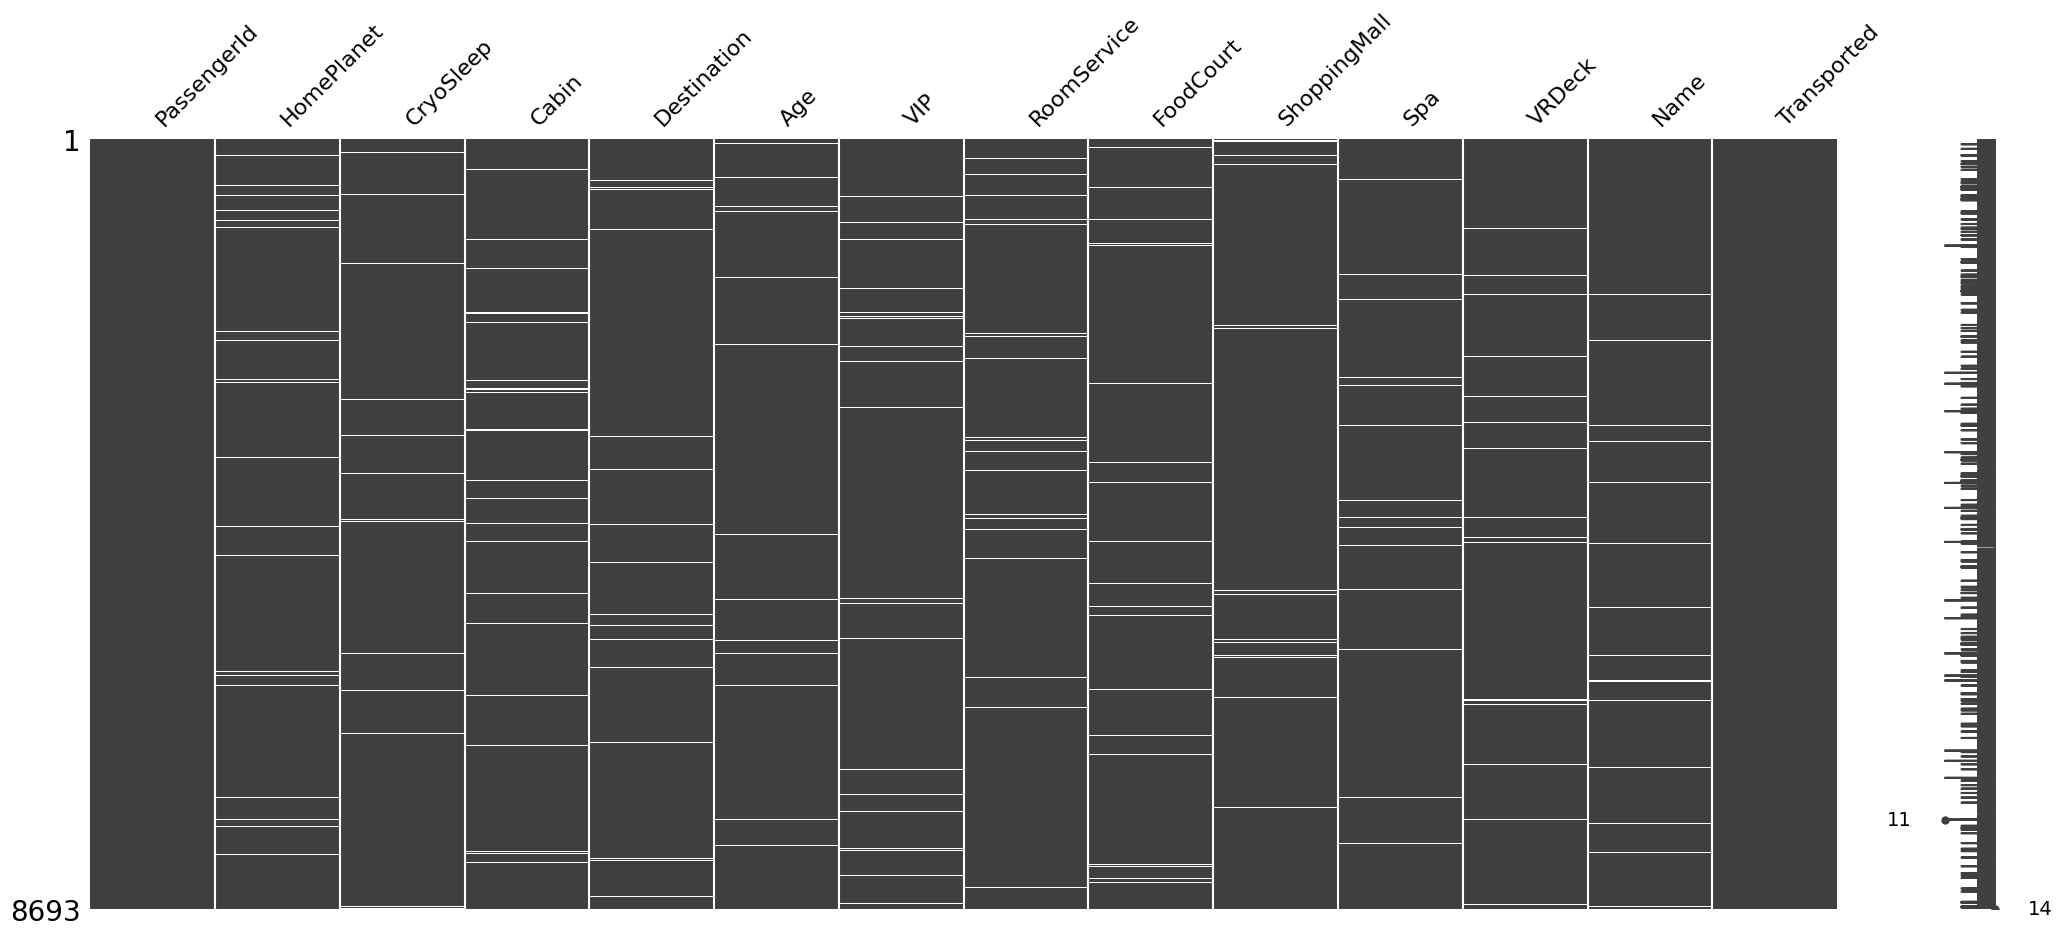

In [7]:
msno.matrix(data);

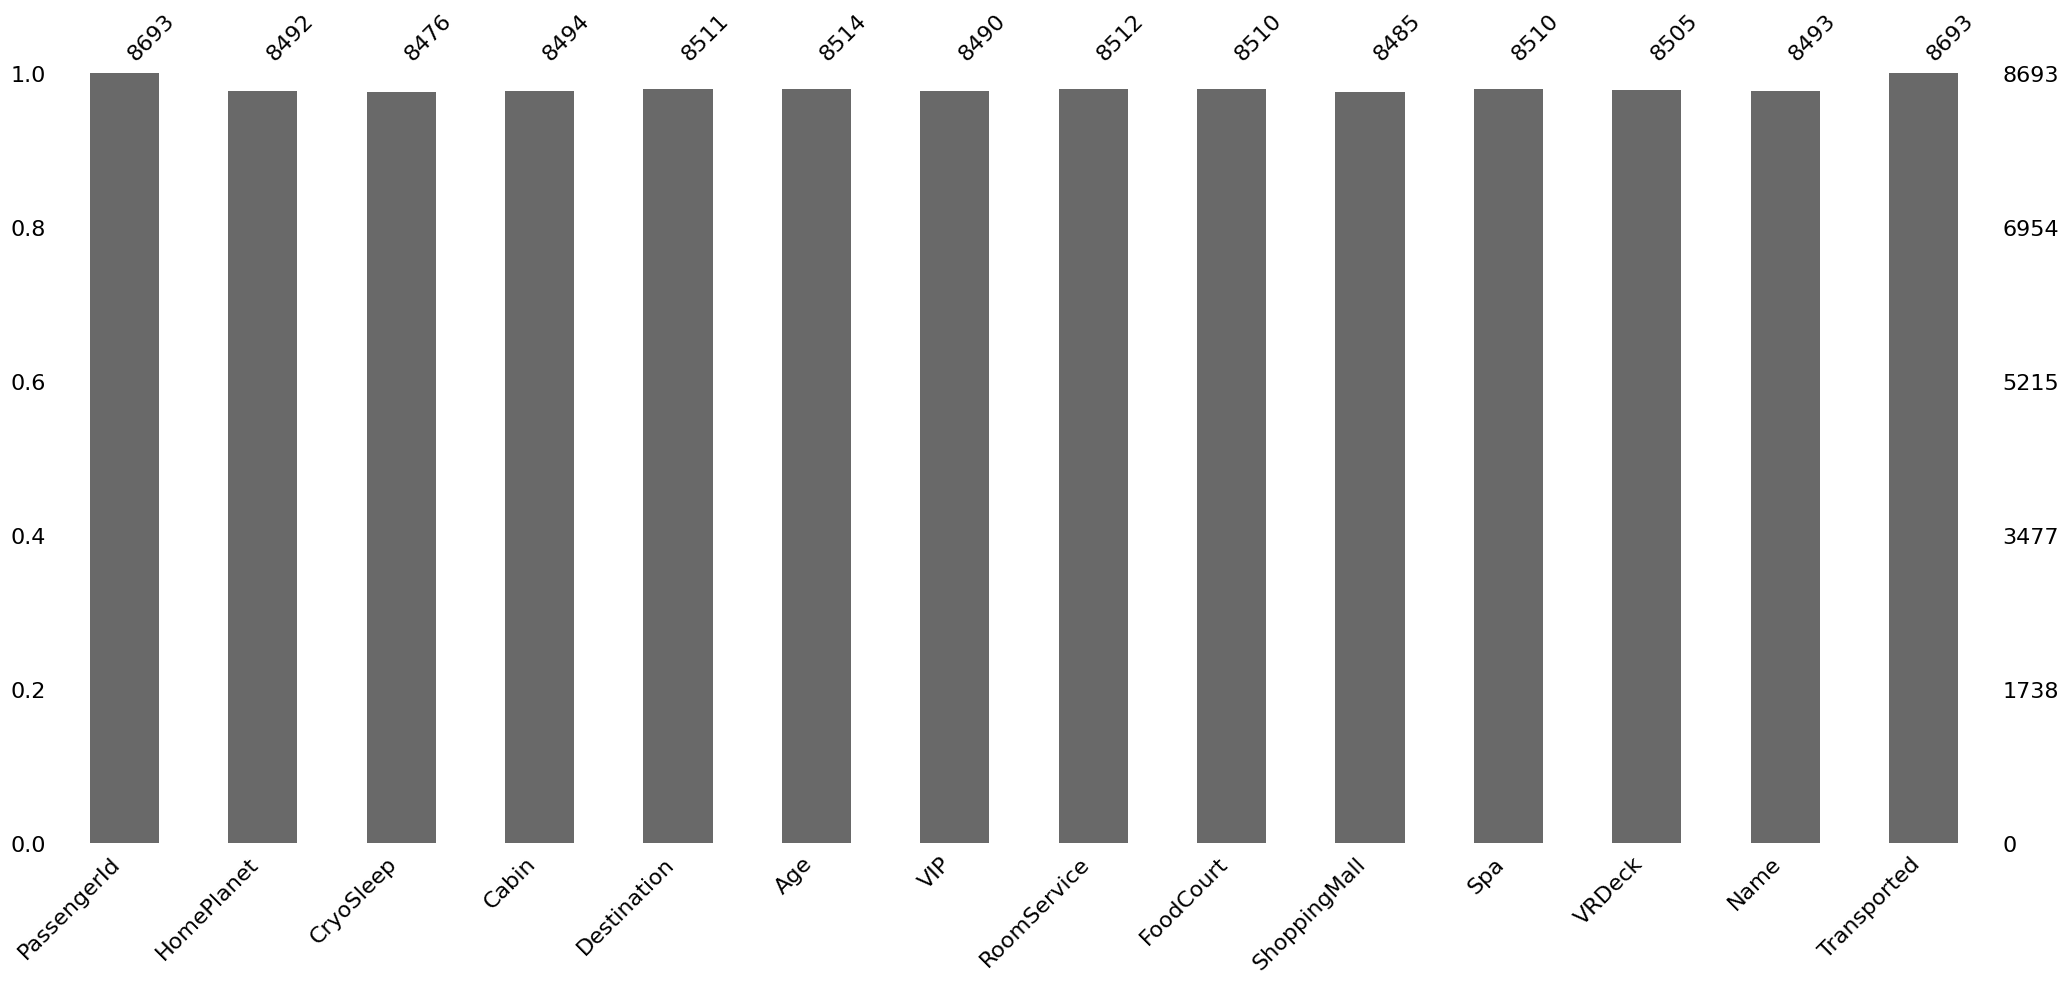

In [8]:
msno.bar(data);

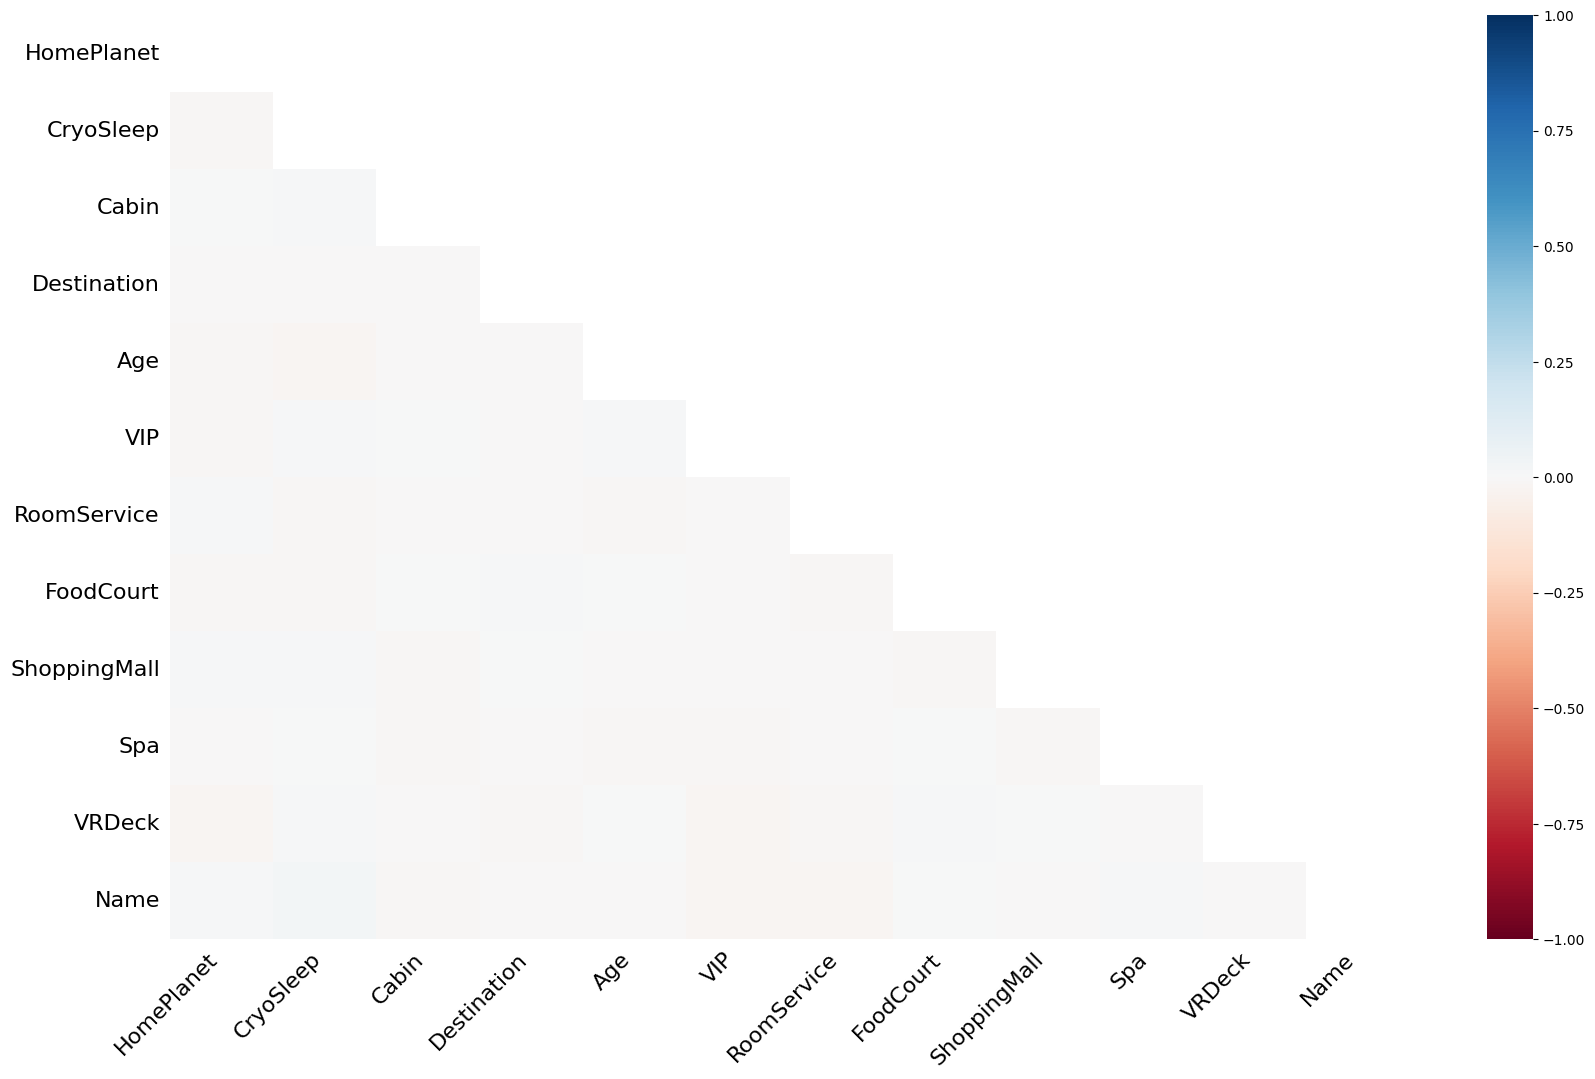

In [9]:
msno.heatmap(data);

> ***Based on the graphs above, there are only 12 missing values which are distributed among all the columns except PassengerId and Transported.***

<p id="1" style="padding: 15px; background-image: url(https://img.freepik.com/free-photo/beautiful-constellations-sky-full-stars_23-2149988813.jpg); margin: 0; color: white; border: 3px solid white; font-family: 'Brush Script MT', cursive;font-weight: bold; font-size: 30px; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.7); letter-spacing: 1.5px;">4 |  Exploratory Data Analysis </p>

> ***now, let's conduct an EDA on the data and unveil the mystery of Spaceship Titanic!***

In [10]:
fig = px.histogram(data, x='Transported', nbins=20, title='Count of Passengers Transported', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***Based on the graph above, we can see that there were more passengers that were transported than passengers that escaped. Let's take a look if the passengers' homeplanets affected this.***

In [11]:
fig = px.histogram(data, x='HomePlanet', nbins=20, title='Distribution of Passengers Transported by Homeplanet', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***The graph shows that passengers from Earth were transported in to the alernate dimension the most This might be because humans may be more vulnerable to such transportation than the inhabitants of other planets, such as Mars and Europa.***

In [12]:
fig = px.histogram(data, x='CryoSleep', nbins=20, title='Distribution of Passengers Transported by CryoSleep', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***As you can see, about half of the passengers were put to CryoSleep, which may have helped some escape the transportation.***

In [13]:
fig = px.histogram(data, x='Cabin', nbins=20, title='Distribution of Passengers Transported by Cabin', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***The cabin from where the most passengers were transported was cabin 734 on deck G on the Starboard side of the ship. Maybe, most of the passengers in this cabin were humans, which are more vulnerable to be transported than other passengers.***

In [14]:
fig = px.histogram(data, x='Destination', nbins=20, title='Distribution of Passengers Transported by Destination', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***The graph shows thats most of the passengers that were transported had in their destination Trappist-1e. The destination of the passengers does not have a straight influence on whether the passengers were transported or not. The fact that the most transported passengers had the destination of Trappist-1e is a coincidence. Or, just most of the passengers heading to Trappist-1e were humans.***

In [15]:
fig = px.histogram(data, x='Age', nbins=20, title='Distribution of Passengers Transported by Age', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***As you can see, the graph shows that passengers of the age 20 - 24 were transported the most.***

In [16]:
fig = px.histogram(data, x='VIP', nbins=20, title='Distribution of Passengers Transported by VIP', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***This graph shows something very interesting. The non-VIP passengers were transported the most, which indicate that VIP passengers might have knew about a possible collision with the spacetime cloud and might have taken measures to avoid not being transported, while not tellign about it to other passengers. According to U.S. tort law, these people may be held responsible according to the Contributory Negligence rule, which holds that people may be held responsible for things that they didn't do, which, in this case, is not telling the other passengers about the possible collision.***

In [17]:
fig = px.histogram(data, x='RoomService', nbins=20, title='Distribution of Roomsevice Billings', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

fig = px.histogram(data, x='FoodCourt', nbins=20, title='Distribution of Food Court Billings', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

fig = px.histogram(data, x='ShoppingMall', nbins=20, title='Distribution of Shopping Mall Billings', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

fig = px.histogram(data, x='Spa', nbins=20, title='Distribution of Spa Billings', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

fig = px.histogram(data, x='VRDeck', nbins=20, title='Distribution of VrDeck Billings', marginal='box', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

> ***These graphs show the distribution of spending amount in the different attractions that were available on Spaceship Titanic.***

<hr>
<hr>

<p id="1" style="padding: 15px; background-image: url(https://img.freepik.com/free-photo/beautiful-constellations-sky-full-stars_23-2149988813.jpg); margin: 0; color: white; border: 3px solid white; font-family: 'Brush Script MT', cursive;font-weight: bold; font-size: 30px; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.7); letter-spacing: 1.5px;">5 |  Predictions </p>

> ***Finally, let's predict which passengers were transported to an alternate dimension. Thanks to [Waticson](https://www.kaggle.com/yutodennou) for his [Master Pipeline tutorial](https://www.kaggle.com/code/yutodennou/preprocessing-master-pipeline) that helped me achieve these results.***

> ***Let's train the first pipline on the data using the XGBClassifier.***

In [18]:
target = "Transported"
X = data.drop([target], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate XGBClassifier with desired parameters
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=10, random_state=1234)

simple_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False)),
        ("model", xgb_classifier), 
    ],
    verbose=True,
)

simple_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               fea...ne,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=1234, ...))],
         verbose=True)

In [19]:
simple_pipeline.fit(X_train, y_train)
print("=" * 30)
print("Prediction Result：", simple_pipeline.predict(X_test))
print("=" * 30)
print("Scores by Train Data：", simple_pipeline.score(X_train, y_train))
print("=" * 30)
print("Scores by Test Data：", simple_pipeline.score(X_test, y_test))

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ........... (step 2 of 3) Processing encoder, total=   0.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=  35.0s
Prediction Result： [0 1 0 ... 1 0 0]
Scores by Train Data： 0.8290192694851883
Scores by Test Data： 0.7326049453709028


> ***Now, let's train the second pipline on the data using RandomForestClassifier.***

In [20]:
target = "Transported"
X = data.drop([target], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate RandomForestClassifier with desired parameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1234)

simple_pipeline2 = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False)),
        ("model", rfc), 
    ],
    verbose=True,
)

simple_pipeline2

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=1234))],
         verbose=True)

In [21]:
simple_pipeline2.fit(X_train, y_train)
print("=" * 30)
print("Prediction Result：", simple_pipeline2.predict(X_test))
print("=" * 30)
print("Scores by Train Data：", simple_pipeline2.score(X_train, y_train))
print("=" * 30)
print("Scores by Test Data：", simple_pipeline2.score(X_test, y_test))

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ........... (step 2 of 3) Processing encoder, total=   0.5s
[Pipeline] ............. (step 3 of 3) Processing model, total=   8.6s
Prediction Result： [False  True False ...  True False False]
Scores by Train Data： 0.7482024733966063
Scores by Test Data： 0.7343300747556066


> ***And, last but not least, let's ensemble the piplines together to get better results.***

In [22]:
ensemble_classifier = VotingClassifier(
    estimators=[("pipeline1", simple_pipeline), ("pipeline2", simple_pipeline2)],
    voting="hard",  # Use 'hard' voting for binary classification
)

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Make predictions using the ensemble classifier
ensemble_preds = ensemble_classifier.predict(test)

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ........... (step 2 of 3) Processing encoder, total=   0.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=  34.4s
[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ........... (step 2 of 3) Processing encoder, total=   0.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=   8.6s


> ***And finally, let's generate the submission file in the correct format.***

In [23]:
preds_bool = [bool(pred) for pred in ensemble_preds]

# Create DataFrame for submission
output = pd.DataFrame({"PassengerId": sub["PassengerId"], "Transported": preds_bool})

# Write DataFrame to CSV file
output.to_csv("Spacesubmission.csv", index=False)

print("Submission Generated Successfully")

Submission Generated Successfully


<div class="author-card" style="border-radius: 10px; overflow: hidden; box-shadow: 0px 0px 20px rgba(0, 0, 0, 0.2); transition: transform 0.3s ease; background-image: url(https://i.pinimg.com/originals/ea/1d/97/ea1d9797c9bf3dda7a23b238e5e4b364.jpg); background-size: cover;">
    <div style="padding: 20px; text-align: center;">
        <h3 style="color: white; font-weight: bold;">Conclusion</h3>
    </div>
    <div style="padding: 20px;">
        <p style="text-align: center; color: white;">
            I hope you liked this notebook and that you learned something new from it. 
        </p>
    </div>
</div>

<style>
    .author-card:hover {
        transform: translateY(-5px);
    }
</style>

<div style="margin: 0 auto;
            max-width: 600px;">
    <div style="background-image: url('https://i.gifer.com/YcsK.gif');
                background-size: cover;
                padding: 50px;
                font-family: Verdana, sans-serif; /* Changed font family */
                border: 4px solid #fff;
                border-radius: 20px;
                color: #7469B6; /* Text color */
                text-align: center;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #fff;">Please Upvote👍 and Fork🍴 God bless you🙏</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>